## Exercise: Build decision tree model to predict survival based on certain parameters

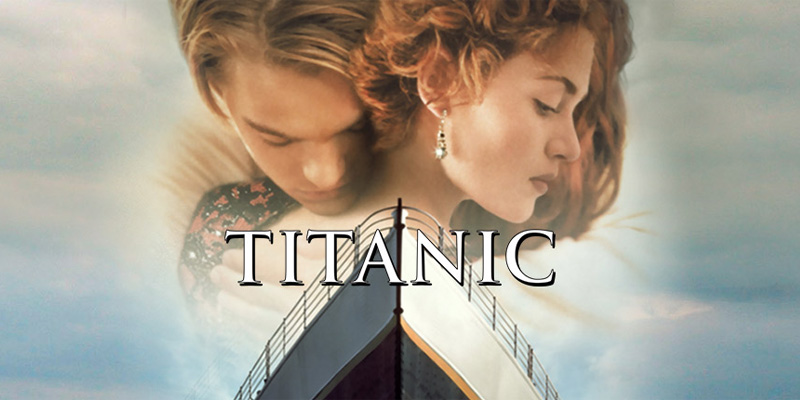

CSV file is available to download at https://github.com/codebasics/py/blob/master/ML/9_decision_tree/Exercise/titanic.csv
In this file using following columns build a model to predict if person would survive or not,

* Pclass
* Sex
* Age
* Fare

Calculate score of your model

In [46]:
import pandas as pd
df = pd.read_csv('./data/titanic.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [47]:
inputs = df[['Pclass', 'Sex', 'Age', 'Fare']]
inputs.head()

Pclass     Sex   Age     Fare
0       3    male  22.0   7.2500
1       1  female  38.0  71.2833
2       3  female  26.0   7.9250
3       1  female  35.0  53.1000
4       3    male  35.0   8.0500

In [48]:
target = df['Survived']
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [49]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
inputs['sex_n'] = le_sex.fit_transform(inputs.Sex)
inputs.head()

C:\Users\Sean\AppData\Local\Temp\ipykernel_4996\883638219.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs['sex_n'] = le_sex.fit_transform(inputs.Sex)


Pclass     Sex   Age     Fare  sex_n
0       3    male  22.0   7.2500      1
1       1  female  38.0  71.2833      0
2       3  female  26.0   7.9250      0
3       1  female  35.0  53.1000      0
4       3    male  35.0   8.0500      1

In [50]:
inputs_n = inputs.drop('Sex', axis='columns')
inputs_n.head()

Pclass   Age     Fare  sex_n
0       3  22.0   7.2500      1
1       1  38.0  71.2833      0
2       3  26.0   7.9250      0
3       1  35.0  53.1000      0
4       3  35.0   8.0500      1

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_n, target, test_size=0.1, random_state=1)

In [52]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(inputs_n, target)


DecisionTreeClassifier()

In [53]:
y_predicted = model.predict(X_test)
y_predicted

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1])

In [66]:
y_test.values

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1])

In [54]:
model.score(X_test, y_test)

0.9888888888888889

In [68]:
print(f'y_predicted::\n{y_predicted}\n\ny_test::\n{y_test.values}')

y_predicted::
[1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1
 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1]

y_test::
[1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1
 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1]
